# Initial setup and pre-processing

In [15]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
con = sqlite3.connect('../data/database.db')
df = pd.read_sql_query('SELECT * FROM account;', con, index_col='id')
df['date'] = pd.to_datetime(df['date'], format='%y%m%d')
df.head()

,districtId,frequency,date
id,,,
576,55,monthly issuance,1993-01-01
3818,74,monthly issuance,1993-01-01
704,55,monthly issuance,1993-01-01
2378,16,monthly issuance,1993-01-01
2632,24,monthly issuance,1993-01-02


# Analyzing frequency

In [17]:
print(df['frequency'].unique())

['monthly issuance' 'issuance after transaction' 'weekly issuance']


Text(0.5, 0, 'frequency of issuance of statements')

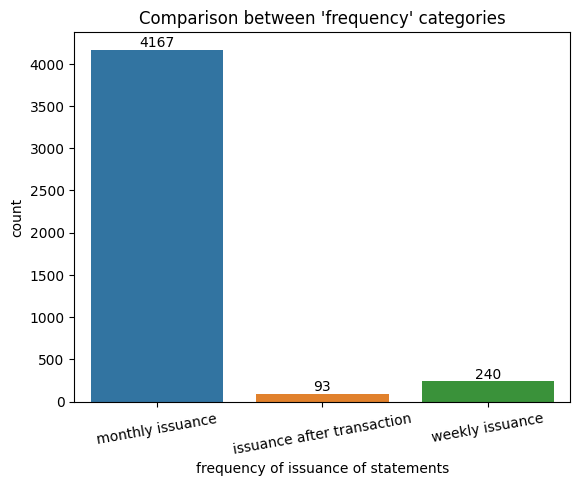

In [22]:
ax = sns.countplot(df, x='frequency')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=10)
plt.title("Comparison between 'frequency' categories")
plt.xlabel('frequency of issuance of statements')

It's much more frequent `monthly issuance` than `issuance after transaction` and `weekly issuance`.

# Analyzing date

Text(0.5, 0, 'year')

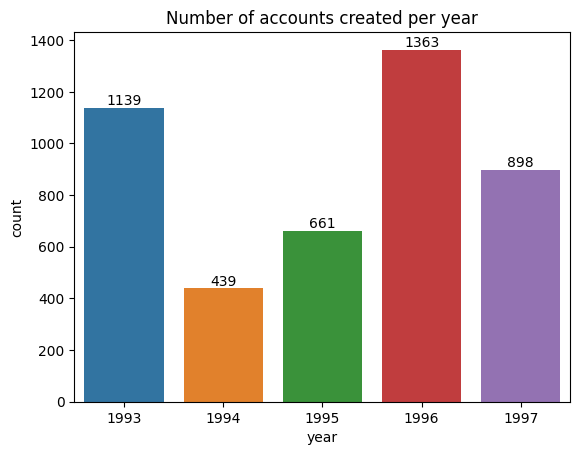

In [24]:
ax = sns.countplot(df, x=df['date'].dt.strftime('%Y'))
ax.bar_label(ax.containers[0])
plt.title('Number of accounts created per year')
plt.xlabel('year')

There's very few new accounts between 1994 and 1995. Maybe due to the dissolution of Czechoslovakia.

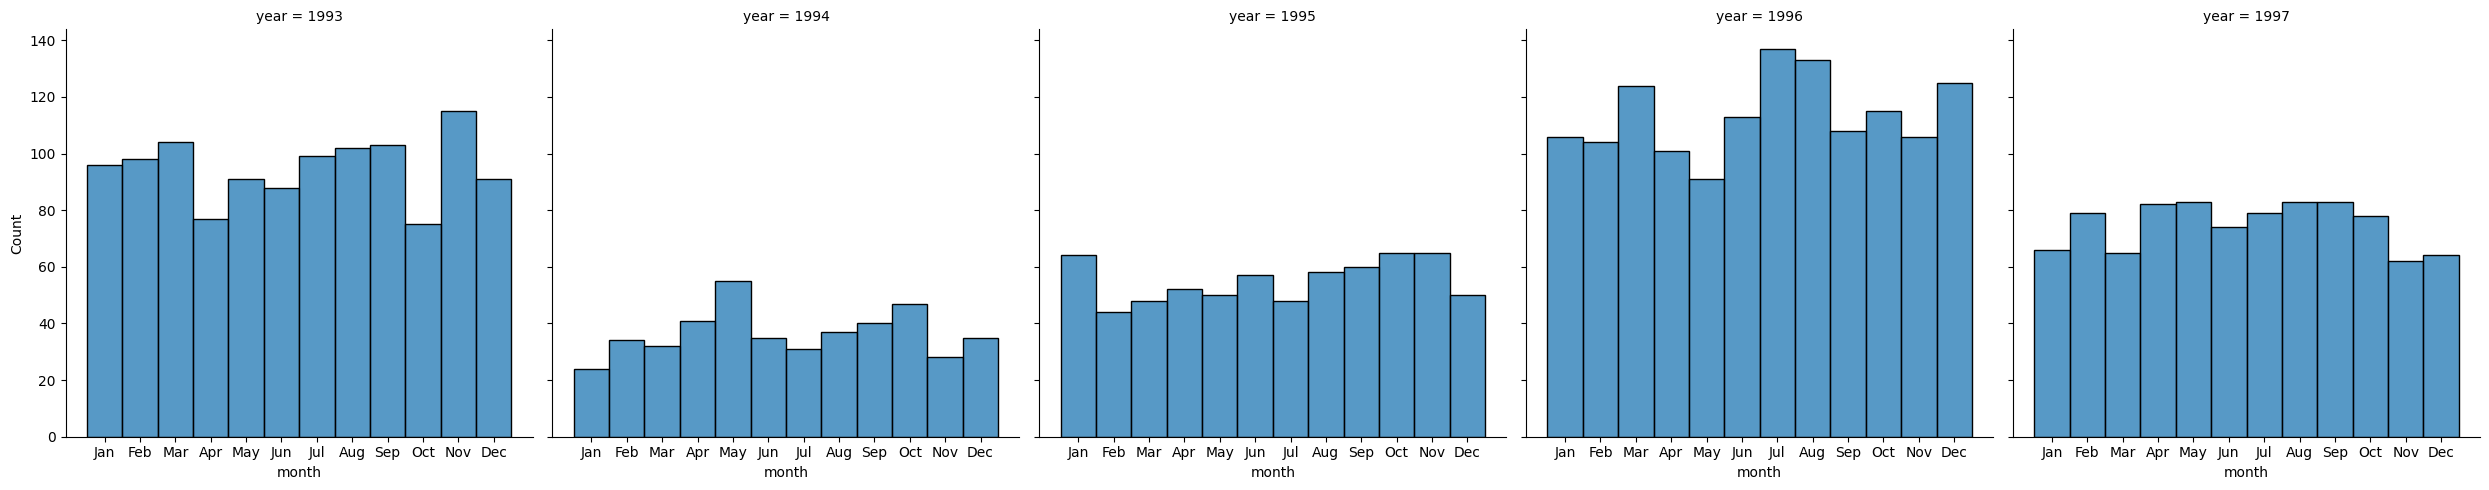

In [8]:
temp = df.copy()
temp['month'] = temp['date'].dt.strftime('%b')
temp['year'] = temp['date'].dt.strftime('%Y')
sns.displot(temp, x='month', col='year')

There's no apparent trend (e.g. more accounts created during summer).

# Analyzing district

Text(0.5, 1.0, 'Top 10 districts with most accounts')

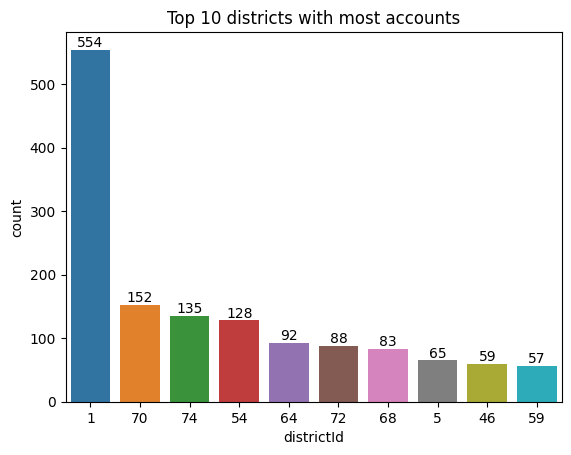

In [27]:
ax = sns.countplot(df, x='districtId', order=df['districtId'].value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title('Top 10 districts with most accounts')

In [29]:
district = pd.read_sql_query('SELECT * FROM district;', con, index_col='id')

In [30]:
district.corrwith(df['districtId'].value_counts(), numeric_only=True)

nInhabitants                            0.818009
nMunicipalitiesSub499Inhabitants       -0.098078
nMunicipalities500to1999Inhabitants    -0.226936
nMunicipalities2000to9999Inhabitants   -0.232959
nMunicipalitiesOver10000Inhabitants    -0.109335
nCities                                -0.261497
urbanInhabitantsRatio                   0.194260
averageSalary                           0.513878
unemploymentRate96                     -0.262063
nEnterpreneursPer1000Inhabitants        0.398753
commitedCrimes96                        0.900715
dtype: float64

In [31]:
district.sort_values('nInhabitants', ascending=False).iloc[:10][['districtName', 'region', 'nInhabitants', 'averageSalary']]

,districtName,region,nInhabitants,averageSalary
id,,,,
1,Hl.m. Praha,Prague,1204953,12541
54,Brno - mesto,south Moravia,387570,9897
74,Ostrava - mesto,north Moravia,323870,10673
70,Karvina,north Moravia,285387,10177
68,Frydek - Mistek,north Moravia,228848,9893
72,Olomouc,north Moravia,226122,8994
64,Zlin,south Moravia,197099,9624
73,Opava,north Moravia,182027,8746
14,Ceske Budejovice,south Bohemia,177686,10045


There are many values for `districtId` 1, looks like it's directly related to the `nInhabitants` and partially related to the `averageSalary`.

In [58]:
temp = district.iloc[df['districtId'].value_counts().iloc[:10].index-1][['districtName', 'nInhabitants']]
temp['count'] = df['districtId'].value_counts().iloc[:10]
temp

,districtName,nInhabitants,count
id,,,
1,Hl.m. Praha,1204953,554
70,Karvina,285387,152
74,Ostrava - mesto,323870,135
54,Brno - mesto,387570,128
64,Zlin,197099,92
72,Olomouc,226122,88
68,Frydek - Mistek,228848,83
5,Kolin,95616,65
46,Nachod,112709,59


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hl.m. Praha'),
  Text(1, 0, 'Karvina'),
  Text(2, 0, 'Ostrava - mesto'),
  Text(3, 0, 'Brno - mesto'),
  Text(4, 0, 'Zlin'),
  Text(5, 0, 'Olomouc'),
  Text(6, 0, 'Frydek - Mistek'),
  Text(7, 0, 'Kolin'),
  Text(8, 0, 'Nachod'),
  Text(9, 0, 'Kromeriz')])

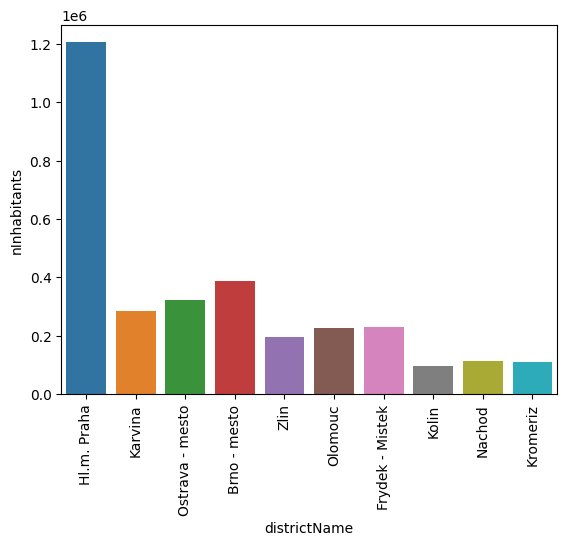

In [63]:
sns.barplot(temp, x='districtName', y='nInhabitants')
plt.xticks(rotation=90)